In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from data import merged_data


In [2]:
df = merged_data()
df.head()

,country_code,year,level,gender,completion_rate,compulsory_education_duration,country_name,education_duration,education_expenditure_gdp_rate,education_expenditure_rate,...,population,population_rate_0to14,population_rate_15to64,pupil_teacher_ratio,region,school_enrollment,school_enrollment_private,teachers,teachers_rate,education_spent
0,ABW,2000-01-01,primary,female,89.069550,NaN,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Latin America & Caribbean,108.901787,NaN,NaN,77.777779,NaN
1,ABW,2000-01-01,primary,male,91.750290,NaN,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Latin America & Caribbean,112.633072,NaN,NaN,NaN,NaN
2,ABW,2000-01-01,primary,total,90.322990,NaN,Aruba,6.0,NaN,64.109573,...,NaN,NaN,NaN,19.05967,Latin America & Caribbean,110.788177,82.446289,486.0,NaN,NaN
3,ABW,2000-01-01,secondary,female,52.930729,NaN,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Latin America & Caribbean,98.113213,NaN,NaN,49.382721,NaN
4,ABW,2000-01-01,secondary,male,59.478802,NaN,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Latin America & Caribbean,94.939461,NaN,NaN,NaN,NaN


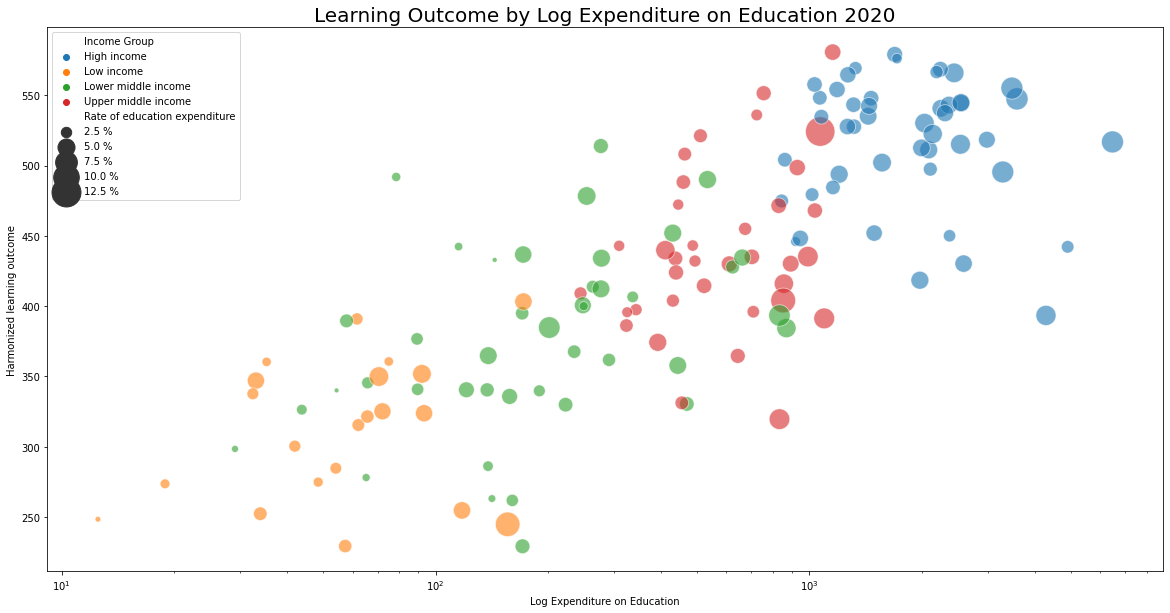

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Learning Outcome by Log Expenditure on Education 2020', size=20)
ax.set_xlabel('Log Expenditure on Education')
ax.set_xscale('log')
ax.set_ylabel('Harmonized learning outcome')
sns.scatterplot(
    data=df[(df.level == 'total') & (df.gender == 'total') & (df.year == datetime(2020, 1, 1))],
    x='education_spent',
    y='learning_outcome',
    hue='income_group',
    size='education_expenditure_gdp_rate',
    alpha=0.6,
    sizes=(10, 1000))
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Income Group'
labels[5] = 'Rate of education expenditure'
labels[6:] = [name + ' %' for name in labels[6:]]
ax.legend(handles, labels)
plt.show()

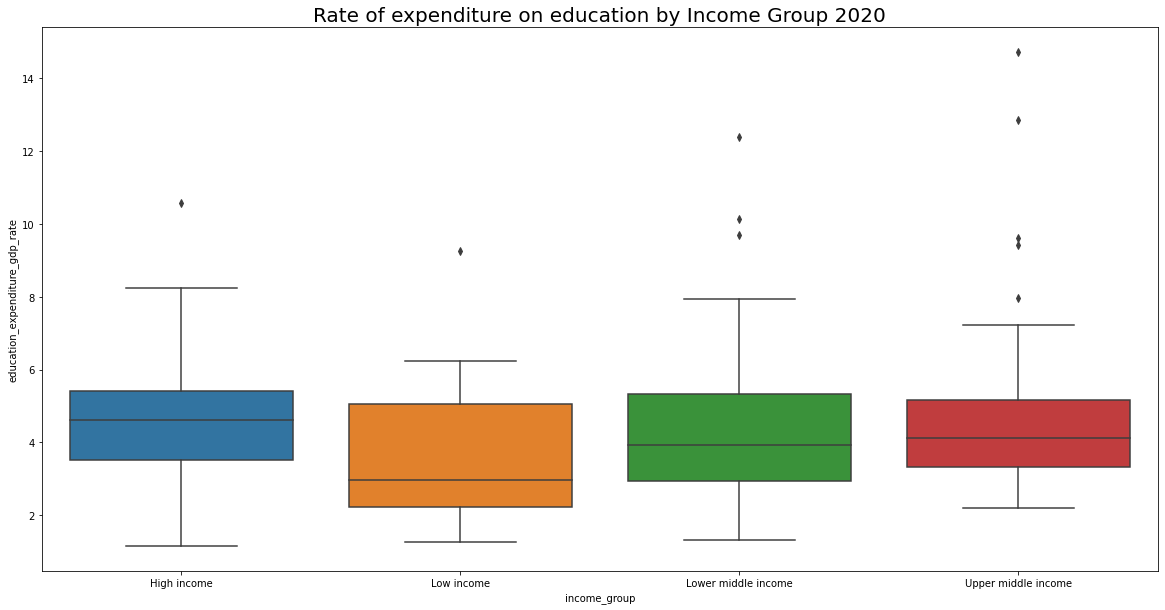

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Rate of expenditure on education by Income Group 2020', size=20)
ax.set_xlabel('Income Group')
ax.set_ylabel('Rate of education expenditure')
sns.boxplot(
    data=df[(df.level == 'total') & (df.gender == 'total') & (df.year == datetime(2020, 1, 1))],
    x='income_group',
    y='education_expenditure_gdp_rate')
plt.show()

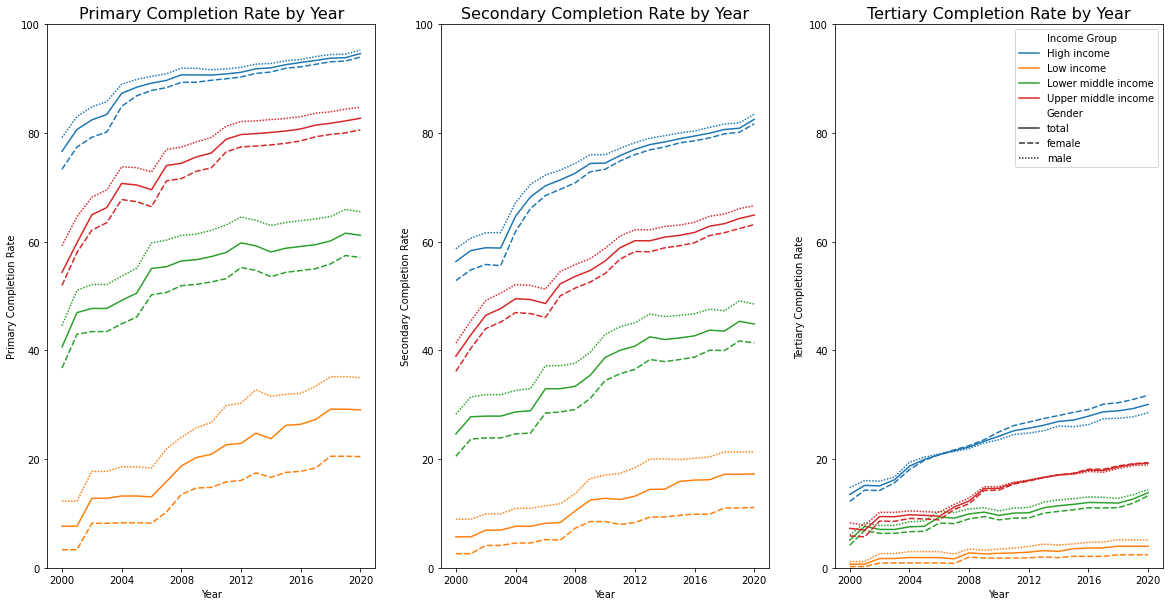

In [52]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=3)
legend = False
for i, level in enumerate(['primary', 'secondary', 'tertiary']):
    if level == 'tertiary':
        legend='auto'
    sns.lineplot(
        data=df[(df.level == level)].groupby(['year', 'income_group', 'gender']).mean().reset_index(),
        x='year',
        y='completion_rate',
        style='gender',
        hue='income_group',
        style_order=['total', 'female', 'male'],
        legend=legend,
        ax=axs[i])
    axs[i].set_title(f'{level.capitalize()} Completion Rate by Year', size=16)
    axs[i].set_ylim((0, 100))
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(f'{level.capitalize()} Completion Rate')
    if legend:
        handles, labels = axs[i].get_legend_handles_labels()
        labels[0] = 'Income Group'
        labels[5] = 'Gender'
        axs[i].legend(handles, labels)
plt.show()

In [ ]:
df5 = df[(df.level == 'total') & (df.gender == 'female')].copy()

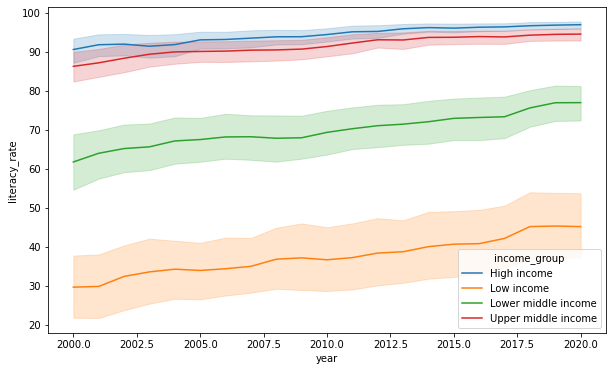

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df5, x='year', y='literacy_rate', hue='income_group')
plt.show()

In [ ]:
df5[(df5.income_group == 'Low income') & df5.year.isin([2017, 2018, 2019, 2020])][['year', 'literacy_rate']].to_csv('test.csv')

In [ ]:
df = merged_data(europe=False)

In [ ]:
years = [year for year in range(1960,2021)]
df.head()

completion_rate  \
country_code year level     gender                    
ABW          2000 primary   female        89.069550   
                            male          91.750290   
                            total         90.322990   
                  secondary female        52.930729   
                            male          59.478802   

                                    compulsory_education_duration  \
country_code year level     gender                                  
ABW          2000 primary   female                            NaN   
                            male                              NaN   
                            total                             NaN   
                  secondary female                            NaN   
                            male                              NaN   

                                   country_name  education_duration  \
country_code year level     gender                                    
ABW          2000 primary   female        Aruba                 NaN   
                            male          Aruba                 NaN   
                            total         Aruba                 6.0   
                  secondary female        Aruba                 NaN   
                            male          Aruba                 NaN   

                                    education_expenditure_gdp_rate  \
country_code year level     gender                                   
ABW          2000 primary   female                             NaN   
                            male                               NaN   
                            total                              NaN   
                  secondary female                             NaN   
                            male                               NaN   

                                    education_expenditure_rate  \
country_code year level     gender                               
ABW          2000 primary   female                         NaN   
                            male                           NaN   
                            total                    64.109573   
                  secondary female                         NaN   
                            male                           NaN   

                                    education_pupils  expenditure_per_student  \
country_code year level     gender                                              
ABW          2000 primary   female          48.60196                      NaN   
                            male                 NaN                      NaN   
                            total                NaN                 13.06282   
                  secondary female          50.50178                      NaN   
                            male                 NaN                      NaN   

                                    expenditure_rate  gdppc  ...  \
country_code year level     gender                           ...   
ABW          2000 primary   female               NaN    NaN  ...   
                            male                 NaN    NaN  ...   
                            total            28.2486    NaN  ...   
                  secondary female               NaN    NaN  ...   
                            male                 NaN    NaN  ...   

                                   out_of_school_rate  population  \
country_code year level     gender                                  
ABW          2000 primary   female                NaN         NaN   
                            male                  NaN         NaN   
                            total             1.60268         NaN   
                  secondary female                NaN         NaN   
                            male                  NaN         NaN   

                                    population_rate_0to14  \
country_code year level     gender                          
ABW          2000 primary   female                    NaN   
  

In [ ]:
df.reindex(years, level='year')

completion_rate  \
country_code year level     gender                    
ABW          2000 primary   female        89.069550   
                            male          91.750290   
                            total         90.322990   
                  secondary female        52.930729   
                            male          59.478802   
...                                             ...   
ZWE          2020 tertiary  male          11.365100   
                            total          9.418530   
                  total     female              NaN   
                            male                NaN   
                            total               NaN   

                                    compulsory_education_duration  \
country_code year level     gender                                  
ABW          2000 primary   female                            NaN   
                            male                              NaN   
                            total                             NaN   
                  secondary female                            NaN   
                            male                              NaN   
...                                                           ...   
ZWE          2020 tertiary  male                              NaN   
                            total                             NaN   
                  total     female                            NaN   
                            male                              NaN   
                            total                             7.0   

                                   country_name  education_duration  \
country_code year level     gender                                    
ABW          2000 primary   female        Aruba                 NaN   
                            male          Aruba                 NaN   
                            total         Aruba                 6.0   
                  secondary female        Aruba                 NaN   
                            male          Aruba                 NaN   
...                                         ...                 ...   
ZWE          2020 tertiary  male       Zimbabwe                 NaN   
                            total      Zimbabwe                 NaN   
                  total     female     Zimbabwe                 NaN   
                            male       Zimbabwe                 NaN   
                            total      Zimbabwe                 NaN   

                                    education_expenditure_gdp_rate  \
country_code year level     gender                                   
ABW          2000 primary   female                             NaN   
                            male                               NaN   
                            total                              NaN   
                  secondary female                             NaN   
                            male                               NaN   
...                                                            ...   
ZWE          2020 tertiary  male                               NaN   
                            total                              NaN   
                  total     female                             NaN   
                            male                               NaN   
                            total                          3.58728   

                                    education_expenditure_rate  \
country_code year level     gender                               
ABW          2000 primary   female                         NaN   
                            male                           NaN   
                            total                    64.109573   
                  secondary female                         NaN   
                            male                           NaN   
...                                                        ...   
ZWE          2020 tertiary  male                           